# Homework 1 - Bódi Vencel - VBW5N9
- Read five arbitrary 256x256 pixel color images in Python, display them, and plot the histograms of the R, G, and B channel values separately. (4 points)
- For each image, calculate the mean and standard deviation of the pixels for each channel, then transform them into a dataset with a mean of 0 and a standard deviation of 1. After that, verify the mean and standard deviation of the resulting dataset. (4 points)
- Read two arbitrary audio files and display their spectrograms. (4 points)
- Transform the spectrograms into a dataset with a mean of 0 and a standard deviation of 1. After that, verify the mean and standard deviation of the resulting dataset. (4 points)
- Using a Python script, download the text content from the webpage http://smartlab.tmit.bme.hu/oktatas-deep-learning, display the text content, and plot the histogram of the frequency of letters in the content. (4 points)

In [32]:
import os
# if not os.path.exists('DL-files'):
#     !git clone https://github.com/bvenczl/DL-files.git


## 01:

Read five arbitrary 256x256 pixel color images in Python, display them, and plot the histograms of the R, G, and B channel values separately. (4 points)

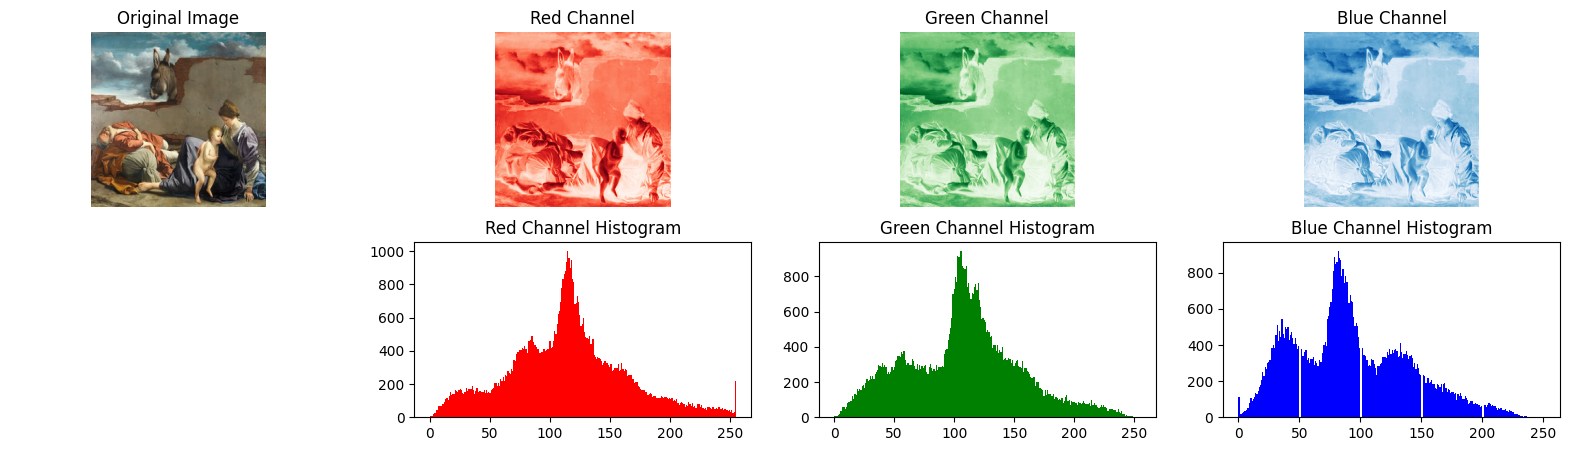

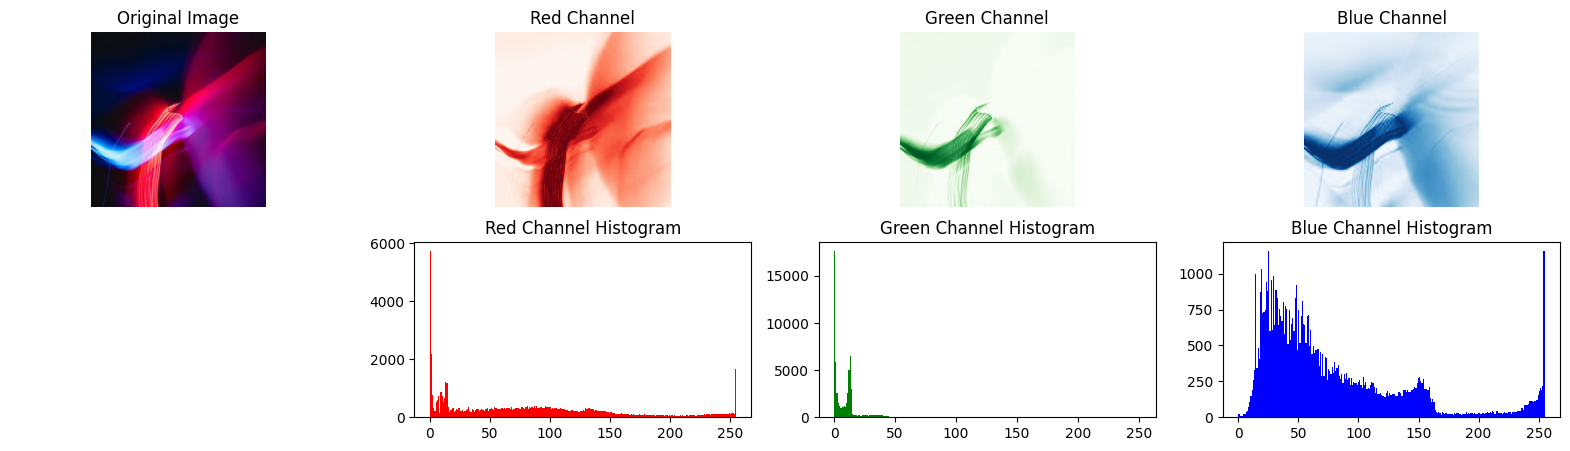

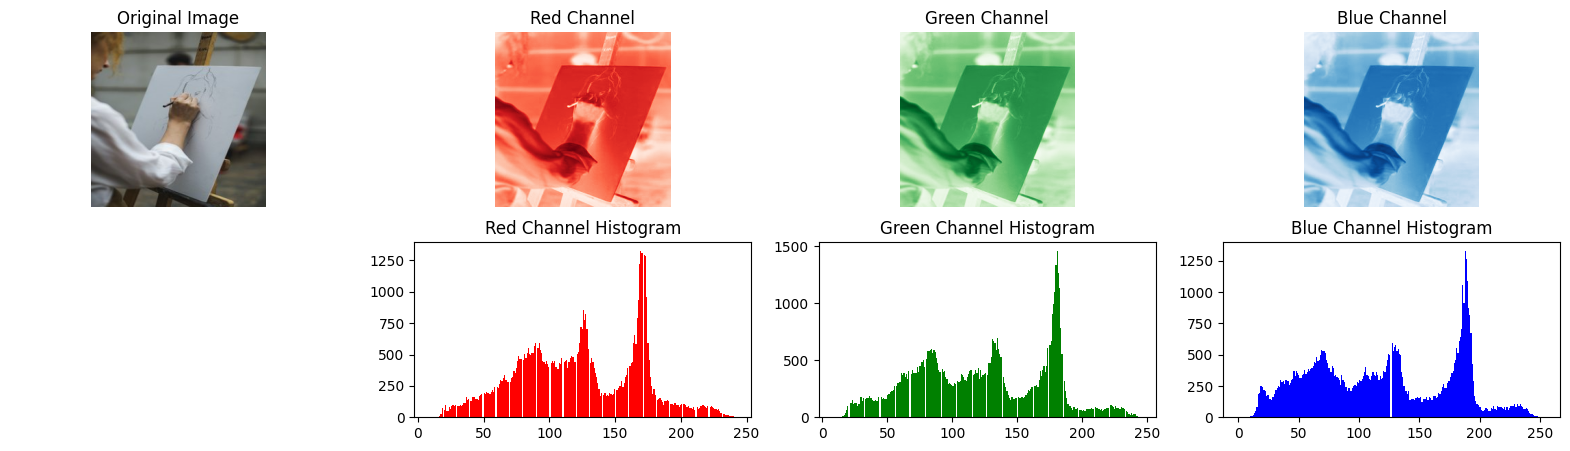

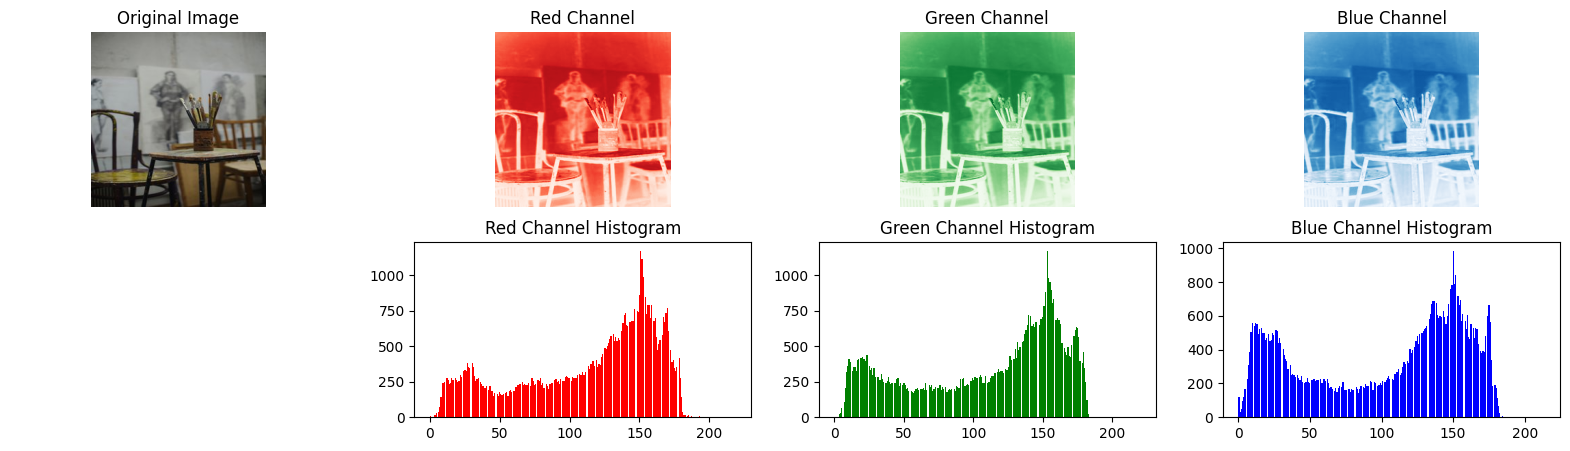

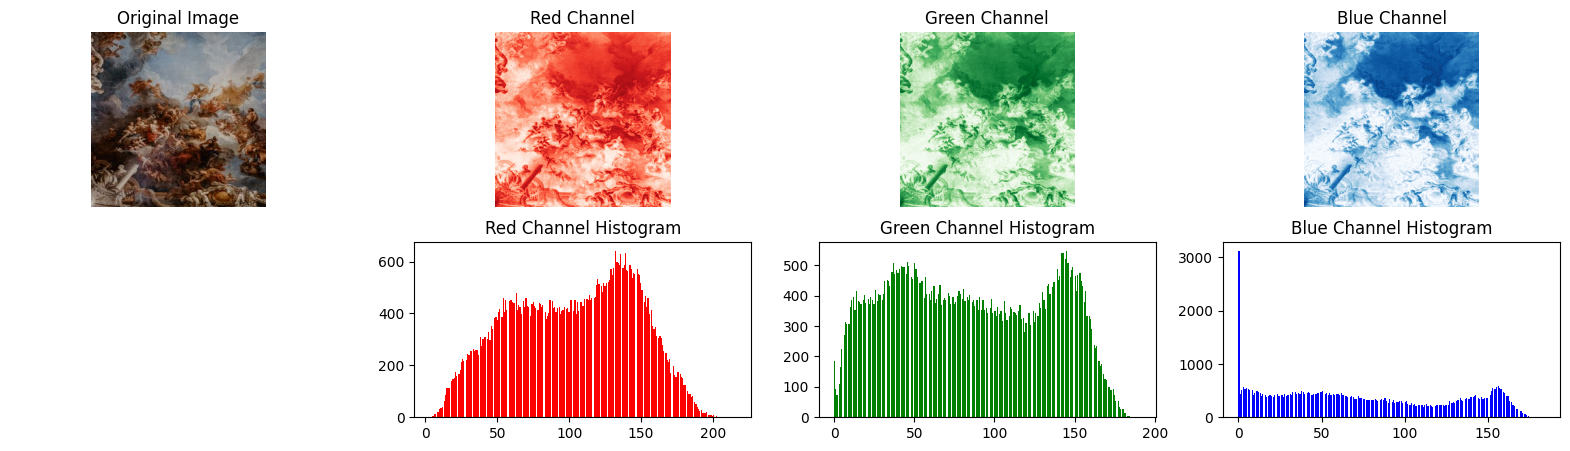

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# get the image files from 01DATA folder, selecting only .jpg ones
current_path = os.getcwd() + '/01DATA'
files = os.listdir(current_path)
image_files = [f for f in files if f.endswith('.jpg')]

# plot each image and its channels
for image_file in image_files:
    image_path = os.path.join(current_path, image_file)
    image = Image.open(image_path)
    r, g, b = image.split() # split the image into red, green and blue channels
    fig, axes = plt.subplots(2, 4, figsize=(20, 5)) # create a figure to display the original image and its channels
    
    # display the original image, and the red, green and blue channels
    axes[0][0].imshow(image)
    axes[0][0].set_title('Original Image')
    axes[0][0].axis('off')
    
    axes[0][1].imshow(r, cmap='Reds') # reds
    axes[0][1].set_title('Red Channel')
    axes[0][1].axis('off')
    
    axes[0][2].imshow(g, cmap='Greens') # greens
    axes[0][2].set_title('Green Channel')
    axes[0][2].axis('off')
    
    axes[0][3].imshow(b, cmap='Blues') # blues
    axes[0][3].set_title('Blue Channel')
    axes[0][3].axis('off')
    
    axes[1][0].axis('off') # making it a bit prettier


    # convert the images to numpy arrays 
    r_array = np.array(r)
    g_array = np.array(g)
    b_array = np.array(b)


    # display the histograms for channel all channels
    axes[1][1].hist(r_array.flatten(), bins=256, color='red') # flattening the arrays for the histograms
    axes[1][1].set_title('Red Channel Histogram')
    
    axes[1][2].hist(g_array.flatten(), bins=256, color='green')
    axes[1][2].set_title('Green Channel Histogram')
    
    axes[1][3].hist(b_array.flatten(), bins=256, color='blue')
    axes[1][3].set_title('Blue Channel Histogram')
    
    plt.show()

## 02:

For each image, calculate the mean and standard deviation of the pixels for each channel, then transform them into a dataset with a mean of 0 and a standard deviation of 1. After that, verify the mean and standard deviation of the resulting dataset. (4 points)

In [34]:
for image_file in image_files:
    image_path = os.path.join(current_path, image_file)
    image = Image.open(image_path)
    r, g, b = image.split()
    
    r_array = np.array(r).flatten()
    g_array = np.array(g).flatten()
    b_array = np.array(b).flatten()
    
    pixelcount = len(r_array)
    
    r_mean = r_array.mean()
    g_mean = g_array.mean()
    b_mean = b_array.mean()
    
    r_SD = np.std(r_array)
    g_SD = np.std(g_array)
    b_SD = np.std(b_array)    

    
    print(f"Red mean BEFORE = {r_mean:.2f}")
    print(f"Red standard deviation BEFORE = {r_SD:.2f}")
    print(f"Green mean BEFORE = {g_mean:.2f}")
    print(f"Green standard deviation BEFOR = {g_SD:.2f}")
    print(f"Blue mean BEFORE = {b_mean:.2f}")
    print(f"Blue standard deviation BEFORE = {b_SD:.2f}\n")
    
    r_array = (r_array - r_mean)/r_SD 
    g_array = (g_array - g_mean)/g_SD
    b_array = (b_array - b_mean)/b_SD
    
    r_mean = r_array.mean()
    g_mean = g_array.mean()
    b_mean = b_array.mean()
    
    r_SD = np.std(r_array)
    g_SD = np.std(g_array)
    b_SD = np.std(b_array)  
    
    print(f"Red mean AFTER = {r_mean:.2f}")
    print(f"Red standard deviation AFTER = {r_SD:.2f}")
    print(f"Green mean AGTER = {g_mean:.2f}")
    print(f"Green standard deviation AFTER = {g_SD:.2f}")
    print(f"Blue mean AFTER = {b_mean:.2f}")
    print(f"Blue standard deviation AFTER = {b_SD:.2f}\n")

Red mean BEFORE = 115.14
Red standard deviation BEFORE = 49.08
Green mean BEFORE = 108.05
Green standard deviation BEFOR = 47.33
Blue mean BEFORE = 92.83
Blue standard deviation BEFORE = 47.19

Red mean AFTER = 0.00
Red standard deviation AFTER = 1.00
Green mean AGTER = 0.00
Green standard deviation AFTER = 1.00
Blue mean AFTER = 0.00
Blue standard deviation AFTER = 1.00

Red mean BEFORE = 84.63
Red standard deviation BEFORE = 73.24
Green mean BEFORE = 20.75
Green standard deviation BEFOR = 43.80
Blue mean BEFORE = 78.07
Blue standard deviation BEFORE = 61.26

Red mean AFTER = 0.00
Red standard deviation AFTER = 1.00
Green mean AGTER = -0.00
Green standard deviation AFTER = 1.00
Blue mean AFTER = -0.00
Blue standard deviation AFTER = 1.00

Red mean BEFORE = 123.06
Red standard deviation BEFORE = 46.02
Green mean BEFORE = 123.05
Green standard deviation BEFOR = 50.55
Blue mean BEFORE = 119.46
Blue standard deviation BEFORE = 57.96

Red mean AFTER = 0.00
Red standard deviation AFTER = 1.

## 03:

Read two arbitrary audio files and display their spectrograms. (4 points)

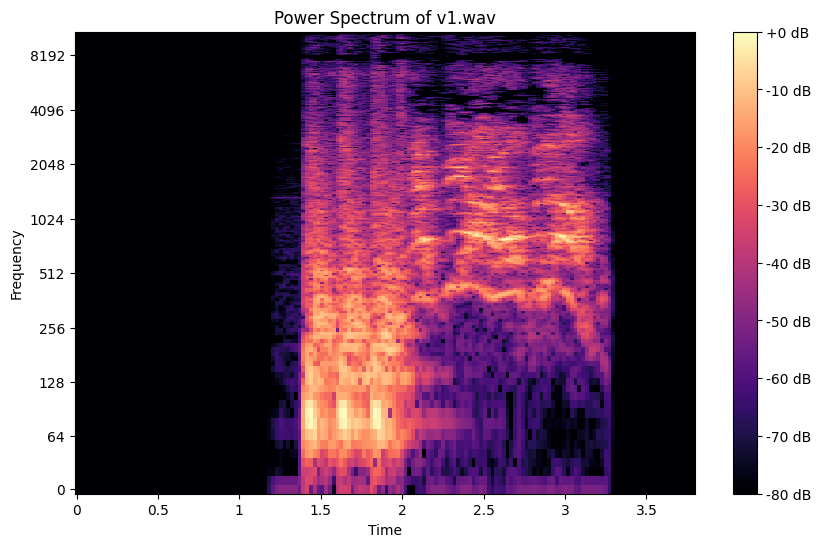

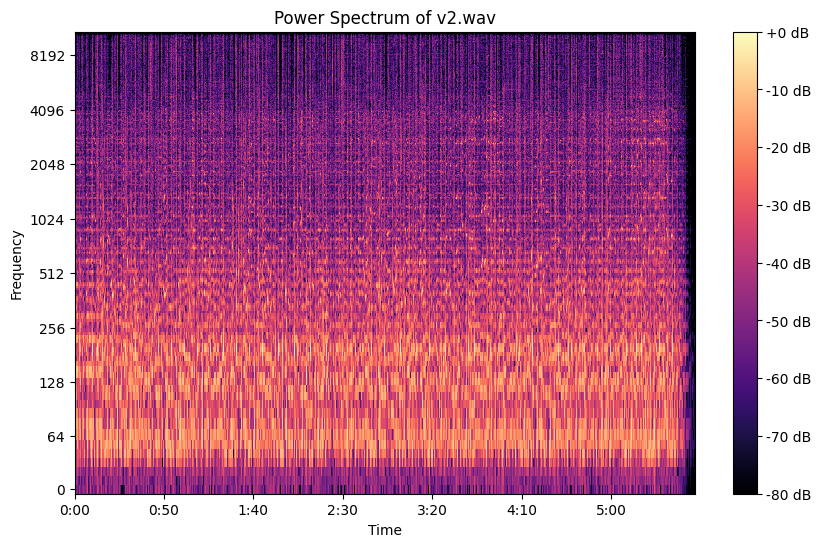

In [35]:
import librosa as lb
import numpy as np
current_path = os.getcwd() + '/01DATA'
files = os.listdir(current_path)
sound_files = [f for f in files if f.endswith('.wav')]

for sound_file in sound_files:
    file_path = os.path.join(current_path, sound_file)
    y, sr = lb.load(file_path)
    S = lb.stft(y)
    S_power = np.abs(S)**2
    
    plt.figure(figsize=(10, 6))
    lb.display.specshow(lb.power_to_db(S_power, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Power Spectrum of {sound_file}')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()